# Customer Churn Prediction With Logistic Regression
**Developed by Maryia Snarava(Time spent 10h)**
![image](img/churn.png)

This Jupyter notebook demonstrates how to build a customer churn prediction model using logistic regression. **Customer churn** is when customers stop doing business with a company. Predicting churn can help businesses take proactive steps to retain customers. By the end of this notebook, you'll have a clear understanding of how to implement logistic regression for churn prediction and interpret its results.

This notebook was created as part of my journey to study and understand Machine Learning. It serves as a practical exercise to:

- Apply ML concepts in a real-world scenario
- Gain hands-on experience with data preprocessing and model building
- Understand the implementation and interpretation of logistic regression
- Develop skills in model evaluation and feature analysis

As a learning tool, this notebook may contain detailed explanations and comments to reinforce understanding of each step in the ML workflow.


## Contents:

1. [**Introduction**](#Introduction)

   - What is Customer Churn?
   -  Importance of Predicting Churn
   -  Overview of Logistic Regression
  

2. **Data Loading and Exploration**
   - Loading the customer dataset
   - Data Variable Description
   - Show values on each column
   - Handling Missing Values


3. **Data Preprocessing**
   - Feature selection
   - Feature Engineering - Adding new variables
   - Scaling numerical features
   - Checking imbalance 

4. **Model Building**
   - Splitting data into training and testing sets
   - Implementing logistic regression
   - Model training

5. **Model Evaluation**
   - Predictions on test data
   - Calculating accuracy, precision, recall, and F1-score
   - Plotting ROC curve

6. **Conclusion and Next Steps**
    - Summary of Results
    - Interpretation
    - Limitations
    - Next Steps

## 1. Introduction


### What is Customer Churn?

Customer churn, also known as customer attrition, refers to the phenomenon where customers stop doing business with a company. In the context of this analysis:

- Churn occurs when a customer cancels their service or stops using a product.
- It's a critical metric for businesses, especially in subscription-based models.
- High churn rates can significantly impact a company's revenue and growth.

### Importance of Predicting Churn

Understanding and predicting churn is crucial for businesses because:

- It's more cost-effective to retain existing customers than to acquire new ones.
- Early identification of potential churners allows for targeted retention efforts.
- Reducing churn rate directly impacts the company's bottom line.
- It provides insights into product or service issues that may be causing customer dissatisfaction.

###  Overview of Logistic Regression

Logistic regression is a statistical method used for predicting a binary outcome:

- It's well-suited for churn prediction, where the outcome is binary (churn or not churn).
- The model estimates the probability that an instance belongs to a particular class.
- Key features of logistic regression:
  - It uses a logistic function to model a binary dependent variable.
  - The output is a probability score between 0 and 1.
  - It's relatively simple to implement and interpret.
  - It performs well for linearly separable classes.


## 2. Data Loading and Exploration

Here, I'll get a better understanding of dataset. First, I load the customer dataset:

In [1553]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
df = pd.read_excel('data/ECommerceDataset.xlsx', sheet_name='E Comm')

data/ECommerceDataset.xlsx


### Data Variable Description
| Column Name | Description |
|----|----|
| **CustomerID** | Unique customer ID |
| **Churn** | Churn Flag |
| **Tenure** | Tenure of customer in organization  |
| **PreferredLoginDevice** | Preferred login device of customer |
| **CityTier** | City tier |
| **WarehouseToHome**| Distance in between warehouse to home of customer |
| **PreferredPaymentMode** | Preferred payment method of customer |
| **Gender** | Gender of customer |
| **HourSpendOnApp** | Number of hours spend on mobile application or website |
| **NumberOfDeviceRegistered** | Total number of deceives is registered on particular customer |
| **PreferedOrderCat** | Preferred order category of customer in last month |
| **SatisfactionScore** | Satisfactory score of customer on service |
| **MaritalStatus** | Marital status of customer |
| **NumberOfAddress** | Total number of added added on particular customer |
| **Complain** | Any complaint has been raised in last month |
| **OrderAmountHikeFromlastYear** | Percentage increases in order from last year |
| **CouponUsed** | Total number of coupon has been used in last month |
| **OrderCount** | Total number of orders has been places in last month |
| **DaySinceLastOrder** | Day Since last order by customer |
| **CashbackAmount** | Average cashback in last month |

In [1554]:
#show last rows from dataset
df.tail(7)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5623,55624,0,5.0,Computer,1,12.0,Credit Card,Male,4.0,4,Laptop & Accessory,5,Single,2,0,20.0,2.0,2.0,NaN,224.36
5624,55625,0,1.0,Mobile Phone,3,12.0,UPI,Female,2.0,5,Mobile Phone,3,Single,2,0,19.0,2.0,2.0,1.0,154.66
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169.04


In [1555]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [1556]:
# Show values on each column.
for col in df.columns:
    print("----------------------------")
    if df[col].dtype == object:
        print(str(col) + ' : ' )
        print(df[col].value_counts())
    else:
        print(str(col) + ' : ')
        print(f'Range {df[col].min()} - {df[col].max()}')

----------------------------
CustomerID : 
Range 50001 - 55630
----------------------------
Churn : 
Range 0 - 1
----------------------------
Tenure : 
Range 0.0 - 61.0
----------------------------
PreferredLoginDevice : 
PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64
----------------------------
CityTier : 
Range 1 - 3
----------------------------
WarehouseToHome : 
Range 5.0 - 127.0
----------------------------
PreferredPaymentMode : 
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64
----------------------------
Gender : 
Gender
Male      3384
Female    2246
Name: count, dtype: int64
----------------------------
HourSpendOnApp : 
Range 0.0 - 5.0
----------------------------
NumberOfDeviceRegistered : 
Range 1 - 6
----------------------------
PreferedOrd

### Handling Missing Values

Missing values are a common issue in real-world datasets. They can occur due to data entry errors, equipment malfunctions, or simply because the information wasn't available. Properly handling missing values is crucial for maintaining the integrity and reliability of your analysis.

First, we need to identify where missing values occur in our dataset - show percent of missing values:

In [1557]:
#Identifying Missing Values
round((df.isnull().sum()*100 / df.shape[0]),2)

CustomerID                     0.00
Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
dtype: float64

All Missing values less than 6% so we can impute them

In [ ]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        df[i].fillna(df[i].median(),inplace=True)

In [1559]:
#Show the result - there are no missed values
round((df.isnull().sum()*100 / df.shape[0]),2)

CustomerID                     0.0
Churn                          0.0
Tenure                         0.0
PreferredLoginDevice           0.0
CityTier                       0.0
WarehouseToHome                0.0
PreferredPaymentMode           0.0
Gender                         0.0
HourSpendOnApp                 0.0
NumberOfDeviceRegistered       0.0
PreferedOrderCat               0.0
SatisfactionScore              0.0
MaritalStatus                  0.0
NumberOfAddress                0.0
Complain                       0.0
OrderAmountHikeFromlastYear    0.0
CouponUsed                     0.0
OrderCount                     0.0
DaySinceLastOrder              0.0
CashbackAmount                 0.0
dtype: float64

## **3. Data Preprocessing**

Data preprocessing is a crucial step in the machine learning pipeline that involves transforming raw data into a clean and usable format. 

***Why is Data Preprocessing Important?***

1. **Data Quality**: Real-world data is often messy, incomplete, or inconsistent. Preprocessing improves the quality of the data.

2. **Model Performance**: Clean, well-prepared data can significantly improve the performance and accuracy of machine learning models.

3. **Bias Reduction**: Proper preprocessing can help reduce biases present in raw data.

4. **Algorithm Requirements**: Many machine learning algorithms have specific data format requirements that preprocessing can address.

5. **Feature Engineering**: Preprocessing often involves creating new features or transforming existing ones to better represent the underlying patterns in the data.


### Feature Engineering - Adding new variables

Let's create new variable that can be important for prediction churn

In [1560]:
df['cashback_per_order'] = df['CashbackAmount'] / df['OrderCount']
df['avg_hour_spend_on_app_per_order'] = df['HourSpendOnApp'] / df['OrderCount'] 
df['satisfaction_score_after_complain'] = df['Complain'] * df['SatisfactionScore']
df['satisfaction_score_2'] = df['SatisfactionScore'] * df['Complain']
df['tenure_2'] =  df['Tenure'] * df['Tenure']
df['tenure_3'] =  df['Tenure'] * df['Tenure'] * df['Tenure']
df['cashback_amount_per_month'] = df['CashbackAmount']/ (df['Tenure'] + 1)
df['DaySinceLastOrder_2'] = df['DaySinceLastOrder'] * df['DaySinceLastOrder']

Transform categorical data to numerical

In [1561]:
# Transform categorical data to numerical
#Using label encoder for categorical variables
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['PreferredLoginDevice'] = le.fit_transform(df['PreferredLoginDevice'])
df['PreferredPaymentMode'] = le.fit_transform(df['PreferredPaymentMode'])
df['Gender'] = le.fit_transform(df['Gender'])
df['PreferedOrderCat'] = le.fit_transform(df['PreferedOrderCat'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])

# It's possible to drop categorical data
#for col in df.columns:
#    if df[col].dtype == object:
        #df = df.drop(col, axis=1)

### Feature selection

Feature selection is a crucial step in the pipeline that involves choosing a subset of relevant features (variables, predictors) for use in model construction. 

***Why is Feature Selection Important?***

1. **Improved Model Performance**: By removing irrelevant or redundant features, you can often improve the model's accuracy and generalization ability.

2. **Reduced Overfitting**: Fewer features can lead to simpler models that are less likely to overfit the training data.

3. **Shorter Training Times**: With fewer features, models typically train faster.

4. **Better Interpretability**: Models with fewer features are often easier to understand and explain.

5. **Reduced Curse of Dimensionality**: In high-dimensional spaces, data becomes sparse, which can be problematic for certain algorithms.

Drop customer ID, this value doesn't necessary for analysis

In [1562]:
df = df.drop('CustomerID', axis=1)

Let's find correlation between all features and Churn

Text(0.5, 1.0, 'Relation Between Features and target')

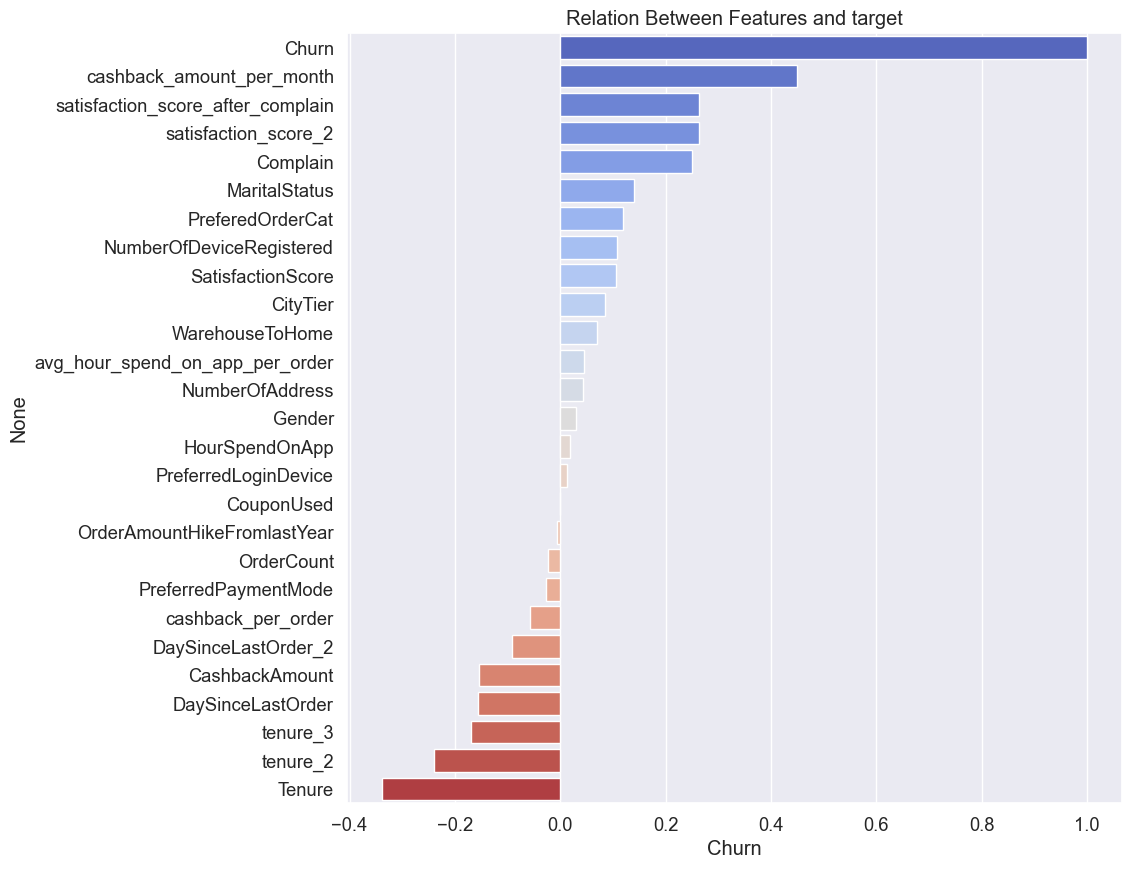

In [1563]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()
churn_corr_vector = corr_matrix['Churn'].sort_values(ascending = False)
plt.figure(figsize = (10,10))
sns.barplot(x = churn_corr_vector, y = churn_corr_vector.index, hue = churn_corr_vector.index, palette = 'coolwarm', legend=False)
plt.title('Relation Between Features and target')

It's possible drop values with correlation near zero:

In [1564]:
for col, val in churn_corr_vector.items():
    if val >= -0.01 and val <= 0.01:
        df = df.drop(col, axis=1)
df.shape[1]

25

### Scaling the data

Scaling is a crucial preprocessing step in many machine learning algorithms. It involves transforming the features so that they are on a similar scale. This is important because many algorithms are sensitive to the scale of the input features.

***Why Scale Data?***

1. Improve algorithm performance: Many algorithms perform better or converge faster when features are on a similar scale.
2. Prevent dominance of large-scale features: Features with larger magnitudes might dominate the model training process.
3. Necessary for certain algorithms: Some algorithms, like gradient descent-based algorithms and SVMs, require scaled data to work properly.


In [1565]:
num = []
for col in df.columns:
    if df[col].dtype == 'float64' or  df[col].dtype == 'int64':
        if col != 'Churn':
            num.append(col)

#importing StandardScaler from SciKit Learn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = df[num]
features = scaler.fit_transform(features)
scaled_df_encoded = df.copy()
scaled_df_encoded[num] = features

  ### Checking imbalance  
  
Class imbalance occurs when the classes in a dataset are not represented equally, with one or more classes having significantly fewer samples than the others.

***Why is Checking for Imbalance Important?***

1. **Model Bias**: Imbalanced datasets can lead to biased models that perform poorly on minority classes.

2. **Performance Metrics**: Traditional accuracy metrics can be misleading with imbalanced data.

3. **Real-world Implications**: In many domains (e.g., fraud detection, medical diagnosis), the minority class is often the class of interest.

4. **Algorithm Sensitivity**: Many machine learning algorithms are sensitive to class imbalance and may not perform well without appropriate adjustments.`


In [1566]:
import plotly.express as px

fig = px.histogram(scaled_df_encoded, x="Churn", color="Churn" ,text_auto= True , color_discrete_sequence = ['#BA1F33','#3A506B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Churn',
yaxis_title='count',
)
fig.show()

Data Imbalanced so let's make Over sample for it Using SMOTETomek:

In [1567]:
from imblearn.combine import SMOTETomek

#X = df[["Tenure", "Complain", "DaySinceLastOrder", "CashbackAmount"]]
X = scaled_df_encoded.drop('Churn', axis=1)
Y = scaled_df_encoded['Churn']

smt = SMOTETomek(random_state=42)
x_over , y_over = smt.fit_resample(X , Y)

## **4. Model Building**

Model building is a step where we use algorithms to create a mathematical representation of a real-world process based on our data. This model can then be used to make predictions or decisions without being explicitly programmed to perform the task.

In [1568]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_over , y_over , test_size = 0.2 , random_state = 42)

### Implementing logistic regression

In [1569]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

### Model training

Accuracy on test set: 0.82152%


<Axes: >

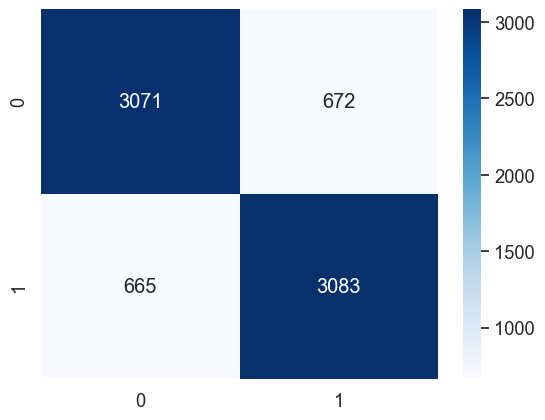

In [1570]:
lr_model.fit(x_train, y_train)

#Make prediction on train data
y_pred = lr_model.predict(x_train)
#Calculate accuracy
print(f"Accuracy on test set: {lr_model.score(x_train, y_train):0.5}%")

from sklearn.metrics import classification_report, confusion_matrix
#confusion matrix training Data
cm_lr = confusion_matrix(y_train, y_pred)
sns.set(font_scale = 1.2)
sns.heatmap(cm_lr,annot = True,fmt = 'd', cmap ='Blues')

## **5. Model Evaluation**

Model evaluation is a critical step that involves assessing how well a model performs on unseen data. It helps us understand the model's strengths and weaknesses, compare different models, and make informed decisions about model selection and deployment.

**Why is Model Evaluation Important?**

1. **Performance Assessment**: It helps quantify how well the model is likely to perform on new, unseen data.
2. **Model Comparison**: It allows us to compare different models and select the best one for our task.
3. **Overfitting Detection**: It helps identify if a model is overfitting to the training data.
4. **Confidence Building**: It provides stakeholders with confidence in the model's predictions.
5. **Improvement Guidance**: It highlights areas where the model can be improved.

### Predictions on test data


Accuracy on test set: 0.81687%


<Axes: >

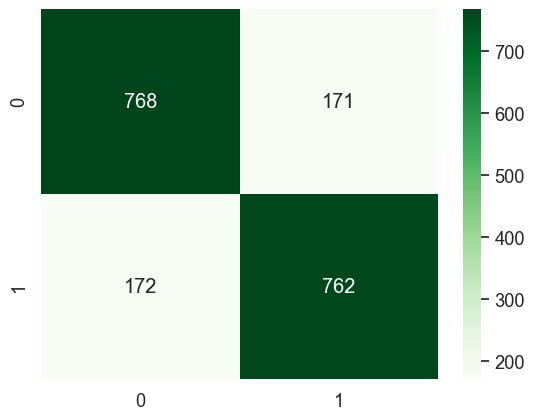

In [1571]:
y_pred_test = lr_model.predict(x_test)
#Calculate accuracy

print(f"Accuracy on test set: {lr_model.score(x_test, y_test):0.5}%")
#confusion matrix test Data
cm_lr = confusion_matrix(y_test, y_pred_test)
cm_lr
sns.set(font_scale = 1.2)
sns.heatmap(cm_lr,annot = True,fmt = 'd', cmap ='Greens')

### Calculating accuracy, precision, recall, and F1-score

In [1572]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       939
           1       0.82      0.82      0.82       934

    accuracy                           0.82      1873
   macro avg       0.82      0.82      0.82      1873
weighted avg       0.82      0.82      0.82      1873



### Plotting ROC curve

The Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) are important tools for evaluating the performance of a binary classification model like our logistic regression for churn prediction.

**The ROC curve** is a graph showing the performance of a classification model at all classification thresholds. It plots two parameters:

1. True Positive Rate (TPR) or Recall: TP / (TP + FN)
2. False Positive Rate (FPR): FP / (FP + TN)


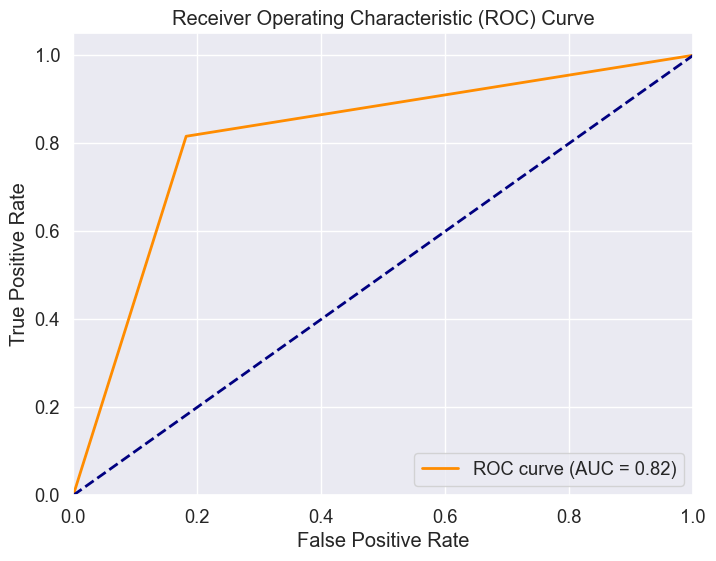

In [1573]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_pred_proba = lr_model.predict_proba(x_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 6. **Conclusion and Next Steps**

### Summary of Results

In this project, I built a customer churn prediction model using logistic regression. My model achieved an accuracy of 82% on the test set, which is a good starting point for predicting customer churn.

Logistic regression was chosen for this study primarily for its simplicity and interpretability, making it an excellent tool for learning the fundamentals of binary classification and understanding the relationship between features and the target variable.

### Interpretation

An accuracy of 82% indicates that our model correctly predicts whether a customer will churn or not in 82% of cases. While this is a solid performance, there's still room for improvement. It's important to note that accuracy alone may not be sufficient to fully evaluate the model, especially if the dataset is imbalanced.

### Limitations

1. Logistic regression assumes a linear relationship between the features and the log-odds of the outcome, which may not always hold true in complex real-world scenarios.
2. It may not capture complex, non-linear relationships in the data.
3. The model's performance might be affected if there are strong correlations between independent variables.

### Next Steps

To improve the model and gain deeper insights, consider the following steps:

1. **Hyperparameter Tuning**: Use techniques like grid search or random search to optimize the logistic regression model's hyperparameters.

2. **Try Advanced Algorithms**: While logistic regression provides a good baseline, other algorithms could potentially yield better results for this classification task:
   - Random Forest: Can capture non-linear relationships and handle feature interactions.
   - Gradient Boosting Machines (e.g., XGBoost, LightGBM): Often provide state-of-the-art performance on many classification tasks.
   - Support Vector Machines (SVM): Can be effective for both linear and non-linear classification.
   - Neural Networks: Can capture complex patterns, especially with larger datasets.

3. **Ensemble Methods**: Combine predictions from multiple models to improve overall performance.

4. **Feature Importance Analysis**: Conduct a deeper analysis of feature importances to understand key drivers of churn.

5. **Regular Model Updates**: Plan for periodic retraining of the model with new data to maintain its predictive power over time.

By implementing these next steps, we can potentially improve the model's performance, gain deeper insights into customer churn, and develop a more robust predictive system.